# Test Environment for Best Models
### Architecture 1 - Model 3
### Architecture 2 - Using GAN
<br>

Inon Elgabsi: 207709551

Nati Forish: 208687004

Iyar Gadolov: 206905754

Roy Edri: 214099046


## Installations and Imports

In [ ]:
%%capture
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from google.colab import files
from PIL import Image
import io
import os
!pip install gdown
import gdown
!pip install ipython-autotime
%load_ext autotime

time: 440 µs (started: 2025-03-21 07:51:02 +00:00)


## Download and Load Models

In [ ]:
arch1_model_url = '1KGVTO2dkI9gfl7Y__wgNAum3gZuia_PK'
arc2_model_url = '1F1a0DNxR2ySBBMATM-EPRPlOb5rCV-Ol'

# Download the models
arch1_model_path = 'arch-1-best-model.h5'
arc2_model_path = 'generator_epoch_115.keras'
!gdown --id {arch1_model_url} -O {arch1_model_path}
!gdown --id {arc2_model_url} -O {arc2_model_path}

# Download Explainer
!gdown --id '1maj8D8AcVVtoYo1gvJn2rRataWH65K5q'

# Load trained models
model_arch1 = load_model(arch1_model_path)
model_arc2 = load_model(arc2_model_path)

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1KGVTO2dkI9gfl7Y__wgNAum3gZuia_PK
To: /content/arch-1-best-model.h5
100% 65.7M/65.7M [00:01<00:00, 62.2MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1F1a0DNxR2ySBBMATM-EPRPlOb5rCV-Ol
To: /content/generator_epoch_115.keras
100% 22.0M/22.0M [00:00<00:00, 41.4MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloadin

time: 18.2 s (started: 2025-03-21 07:51:02 +00:00)


## Define Funs for Preprocessing and Upload Images from User

In [ ]:
def preprocess_image_for_arch1(image):
    """Preprocess for ARCH1: expects grayscale input (128,128,1)."""
    image = image.resize((128, 128))
    image = np.array(image).astype(np.float32) / 255.0
    if image.ndim == 2:
        image = np.expand_dims(image, axis=-1)
    image = np.expand_dims(image, axis=0)
    return image

def preprocess_image_for_arc2(image):
    """Preprocess for ARC2: expects RGB input (128,128,3)."""
    image = image.resize((128, 128))
    image = image.convert('RGB')  # Ensure image is RGB
    image = np.array(image).astype(np.float32) / 255.0
    image = np.expand_dims(image, axis=0)
    return image

## Define Upload and Test Function
def upload_and_test():
    """Handles image upload and model inference for two."""
    uploaded = files.upload()
    for file_name in uploaded.keys():
        pil_image = Image.open(io.BytesIO(uploaded[file_name]))

        input_arch1 = preprocess_image_for_arch1(pil_image.convert('L'))
        input_arc2 = preprocess_image_for_arc2(pil_image.convert('RGB'))

        output_arch1 = model_arch1.predict(input_arch1)
        output_arc2 = model_arc2.predict(input_arc2)

        fig, axes = plt.subplots(1, 4, figsize=(16, 4))
        axes[0].imshow(input_arch1[0, :, :, 0], cmap='gray')
        axes[0].set_title("Input (Grayscale)")
        axes[1].imshow(output_arch1[0])  # ARCH1 output (RGB)
        axes[1].set_title("ARCH-1 Output")
        axes[2].imshow(output_arc2[0])   # ARC2 output (RGB)
        axes[2].set_title("ARC2 (RGB) Output")
        for ax in axes:
            ax.axis('off')
        plt.show()

time: 8.05 ms (started: 2025-03-19 18:15:59 +00:00)


## Run the Models!

Saving 128-bird-bw.jpg to 128-bird-bw.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


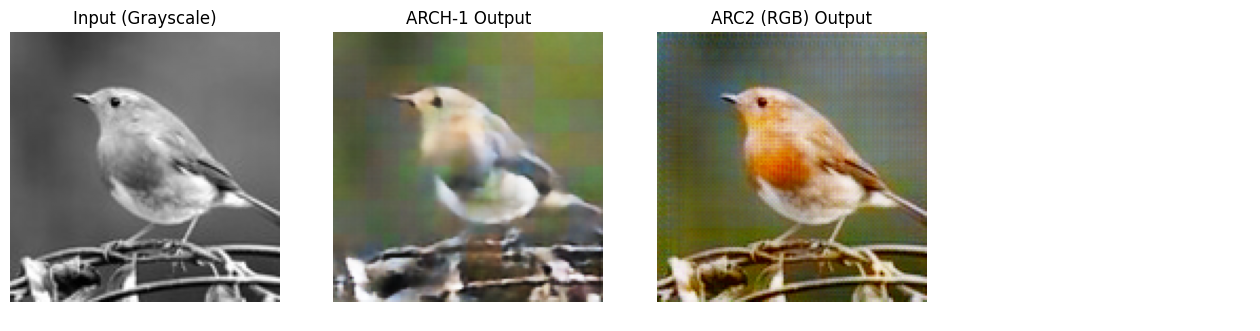

time: 19.2 s (started: 2025-03-19 18:15:59 +00:00)


In [ ]:
upload_and_test()